<a href="https://colab.research.google.com/github/hebatoallah-yehya1111/Fake_OR_Real/blob/main/Data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import random
from random import seed
from random import randint

## Reading DataFrame


In [ ]:
#I use the given Dataset and we can also this Dataset that contain Arabic Names 
#https://raw.githubusercontent.com/Eslam2014/arabic_names_with_gender/master/arabic_names_with_gender.csv
pre_df = pd.read_csv('Arabic_names.csv')
pre_df

,Name,Gender
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
...,...,...
1400,وهبة,M
1401,ياسر,M
1402,يحيى,M
1403,يزيد,M


## Match Arabic letters
This Step to solve 2 problems in data 

First Problem:  Characters consistency 





Second Problem: Compound Names





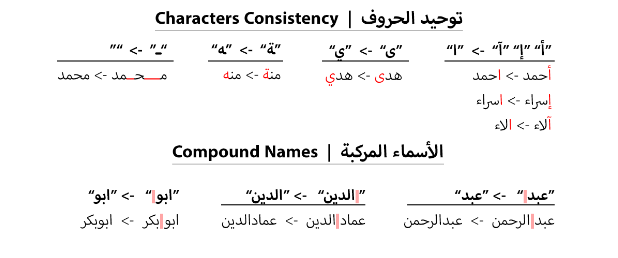

In [ ]:
inconsistency_mapper = {
    "أ": "ا",
    "إ": "ا",
    "آ": "ا",
    "ة": "ه",
    "ى": "ي",
    "ـ": "",
    " الدين": "الدين",
    "عبد ": "عبد",
    "ابو ": "ابو",
    "ام ": "ام",
}

In [ ]:
for k, v in inconsistency_mapper.items():
    pre_df['Name'] = pre_df['Name'].str.replace(k, v)
pre_df.head(20)

,Name,Gender
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
5,اعتدال,F
6,اعتماد,F
7,افتخار,F
8,افتكار,F
9,البتول,F


# Splitting to Males Names 

this step to spilt males names in a list to consider the basic structure of the full name combination[(Female OR male) Name + male Name +male Name]








In [ ]:
df_male=pre_df[pre_df['Gender']=='M']
df_male.head(20)

,Name,Gender
552,ابراهيم,M
553,اسلم,M
554,البراء,M
555,الحبيب,M
556,الخضر,M
557,العابدين,M
558,المثني,M
559,ادم,M
560,ابان,M
561,ابلج,M


In [ ]:
arr_male=df_male["Name"].to_numpy()
arr_male

array(['ابراهيم', 'اسلم', 'البراء', 'الحبيب', 'الخضر', 'العابدين',
       'المثني', 'ادم', 'ابان', 'ابلج', 'ابوبكر', 'اجاويد', 'اجيد',
       'احمد', 'احنف', 'اخزم', 'اخضر', 'اخطب', 'ادعج', 'ادغم', 'ادهم',
       'اديب', 'ارغد', 'ارقم', 'اريب', 'ازهر', 'ازور', 'اسامه', 'اسد',
       'اسعد', 'اسلم', 'اسمر', 'اشجع', 'اشرف', 'اشرم', 'اشقر', 'اشهب',
       'اشهم', 'اشيم', 'اصيل', 'اعسر', 'اغلب', 'اغيد', 'اكبر', 'اكثم',
       'اكرم', 'اكمل', 'امان', 'امجد', 'اميه', 'امير', 'امين', 'انس',
       'انعم', 'انمار', 'انور', 'اهيم', 'اوس', 'اويس', 'ايسر', 'ايمن',
       'ايهم', 'ايوب', 'ابراهيم', 'احسان', 'ادريس', 'اسحاق', 'اسلام',
       'اسماعيل', 'امام', 'اياد', 'اياس', 'ايهاب', 'باتل', 'بادي', 'بارح',
       'بارع', 'باسط', 'باسق', 'باسل', 'باسم', 'باشق', 'باهر', 'بدر',
       'بديع', 'براء', 'برد', 'برهان', 'بسام', 'بسيم', 'بشار', 'بشاره',
       'بشر', 'بشير', 'بطاح', 'بطرس', 'بكار', 'بكر', 'بكري', 'بلال',
       'بليغ', 'بندر', 'بهاء', 'بهجت', 'بهلول', 'بهيج', 'تائب', 'تامر',
       'تركي

In [ ]:
mixed_arr=pre_df["Name"].to_numpy()
mixed_arr

array(['ابتسام', 'ابتهاج', 'ابتهال', ..., 'يحيي', 'يزيد', 'يعقوب'],
      dtype=object)

## Generate Real Names


In [ ]:
#Simple Function to take random sample of names in the pervouis two lists to create the data set
def random_names(names, size):
    return np.random.choice(names, size=size)

In [ ]:
size=3000
df_Real_Names = pd.DataFrame(columns=['First Name','Middle Name', 'Last Name'])
df_Real_Names['First Name'] = random_names(mixed_arr, size )
df_Real_Names['Middle Name'] = random_names(arr_male, size)
df_Real_Names['Last Name'] = random_names(arr_male, size) 
df_Real_Names['Full Name'] = df_Real_Names['First Name'] + " " +  df_Real_Names['Middle Name']+" "+df_Real_Names["Last Name"].astype(str)
df_Real_Names.head(20)


,First Name,Middle Name,Last Name,Full Name
0,ايثار,عائد,سمعان,ايثار عائد سمعان
1,غفار,العابدين,ساجر,غفار العابدين ساجر
2,منصفه,عصام,رشوان,منصفه عصام رشوان
3,عيده,زاهر,سعود,عيده زاهر سعود
4,شادن,المثني,حمدون,شادن المثني حمدون
5,امتثال,عابد,مناع,امتثال عابد مناع
6,زينب,بكار,عمير,زينب بكار عمير
7,لميس,مرداس,نوفل,لميس مرداس نوفل
8,صباح,عبدالمنان,سهيل,صباح عبدالمنان سهيل
9,غيث,صائن,عبيد,غيث صائن عبيد


In [ ]:
df_Real_Names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   First Name   3000 non-null   object
 1   Middle Name  3000 non-null   object
 2   Last Name    3000 non-null   object
 3   Full Name    3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


In [ ]:
df_Real_Names['Label']='Real'
df_Real_Names.head(20)

,First Name,Middle Name,Last Name,Full Name,Label
0,ايثار,عائد,سمعان,ايثار عائد سمعان,Real
1,غفار,العابدين,ساجر,غفار العابدين ساجر,Real
2,منصفه,عصام,رشوان,منصفه عصام رشوان,Real
3,عيده,زاهر,سعود,عيده زاهر سعود,Real
4,شادن,المثني,حمدون,شادن المثني حمدون,Real
5,امتثال,عابد,مناع,امتثال عابد مناع,Real
6,زينب,بكار,عمير,زينب بكار عمير,Real
7,لميس,مرداس,نوفل,لميس مرداس نوفل,Real
8,صباح,عبدالمنان,سهيل,صباح عبدالمنان سهيل,Real
9,غيث,صائن,عبيد,غيث صائن عبيد,Real


In [ ]:
df_Real_Names=df_Real_Names[['Full Name','Label']]
df_Real_Names.head(20)

,Full Name,Label
0,ايثار عائد سمعان,Real
1,غفار العابدين ساجر,Real
2,منصفه عصام رشوان,Real
3,عيده زاهر سعود,Real
4,شادن المثني حمدون,Real
5,امتثال عابد مناع,Real
6,زينب بكار عمير,Real
7,لميس مرداس نوفل,Real
8,صباح عبدالمنان سهيل,Real
9,غيث صائن عبيد,Real


##  Generate Fake Names

In [ ]:
### garbage Data
def Generate_Fake_Data(name):
  #seed(1)
  LETTERS = u'ابتةثجحخدذرزسشصضطظعغفقكلمنهويءآأؤإئ'
  arr_num=[]
  arr_letter=[]
  x=randint(1, len(name))
  for _ in range(x):
    value = randint(1, len(name))
    arr_num.append(value)
  for _ in range(x):
    letter=random.choice(LETTERS)
    arr_letter.append(letter)
  for _ in range(len(arr_num)):
    name = name[:arr_num[_]] + arr_letter[_] + name[arr_num[_] + 1:]
  return name,'Fake'

In [ ]:
fake_names_list=[]
#df_Real_Names.index

for i in df_Real_Names['Full Name'] :
 fake_names=Generate_Fake_Data(i)
 fake_names_list.append(fake_names)
fake_names_list


  

['اججتحقعائدؤسععبش',
 'غفارجالعثبديق ساجرل',
 'منتحهطظقجمسرشواصإ',
 'عيدهظئءها سعود',
 'شذهنذخلطننع حمحون',
 'افتثال عابد مناع',
 'زينع بةارشضنيخؤ',
 'لآحيامردنإؤنظسيء',
 'صباح عباالماان سهضلز',
 'غشث ئاسنيربقلش',
 'حكمت ثرإشكئاقنت',
 'ساجد رمير معاث',
 'ولاءازدصدنحوربكضافظ',
 'مآءم رسئفضثفطاحك',
 'روابي ركان مستصر',
 'حدبل جتآختعبدتئثمابف',
 'راقيهظنةماقدينخقفص',
 'ائفشخاأوبصداوؤ',
 'جنةآحئزرئمسلو',
 'اويسآااثيح عمرو',
 'فجرخغجامآمنعم',
 'اميمدئقدأحهكايان',
 'شعثيصصءغءوخطدبز',
 'ساجد ذدءشأةشرفع',
 'زعدءن اإسجءإبداجحذيإج',
 'بدشطآتاكف ءكغم',
 'نعرمدمجمثنطؤرس',
 'سمشغشعلدعقحيبغثزب',
 'اثيرضوفأق فموح',
 'قهج جزتد ئبدائبشقيت',
 'حمزهةةإيفدلاين',
 'الطةفكساءمةنغئانب',
 'سدرصزطمي رشادر',
 'كاريا عبدالحفمظ وفيق',
 'ثوغنطرئاةراشحق',
 'مكعطد اشضف أيض',
 'خسفن شعسغنبشهكذذ',
 'غيدحبآطامح مخآب',
 'فحوغ غءةققغآرئش',
 'ميمونه فتح مبرجر',
 'مططقم كتلب فرإةؤ',
 'طريفه رفيع موصوم',
 'جشهانبمعغورهضمسفيس',
 'كليب ضبثح فتيزئ',
 'مجاور عبدالوزومذعثعخةخوغلا',
 'مثإد أاجيؤحنهخ',
 'سضام فراس فخد',
 'اوتهاد ا

In [ ]:
fake_names_df = pd.DataFrame(fake_names_list, columns =['Full Name'])
fake_names_df

,Full Name
0,اججتحقعائدؤسععبش
1,غفارجالعثبديق ساجرل
2,منتحهطظقجمسرشواصإ
3,عيدهظئءها سعود
4,شذهنذخلطننع حمحون
...,...
2995,عبصقأؤليل مثثبيخاصيان
2996,فرشاتخآبدرإه اديسص
2997,ريضاج ناشل قسيم
2998,ميلءد وديج سبةز


In [ ]:
fake_names_df['Label']='Fake'
fake_names_df


,Full Name,Label
0,اججتحقعائدؤسععبش,Fake
1,غفارجالعثبديق ساجرل,Fake
2,منتحهطظقجمسرشواصإ,Fake
3,عيدهظئءها سعود,Fake
4,شذهنذخلطننع حمحون,Fake
...,...,...
2995,عبصقأؤليل مثثبيخاصيان,Fake
2996,فرشاتخآبدرإه اديسص,Fake
2997,ريضاج ناشل قسيم,Fake
2998,ميلءد وديج سبةز,Fake


#Final Dataset

In [ ]:
frames = [df_Real_Names, fake_names_df]

Full_df= pd.concat(frames)
Full_df



,Full Name,Label
0,ايثار عائد سمعان,Real
1,غفار العابدين ساجر,Real
2,منصفه عصام رشوان,Real
3,عيده زاهر سعود,Real
4,شادن المثني حمدون,Real
...,...,...
2995,عبصقأؤليل مثثبيخاصيان,Fake
2996,فرشاتخآبدرإه اديسص,Fake
2997,ريضاج ناشل قسيم,Fake
2998,ميلءد وديج سبةز,Fake


In [ ]:
Full_df=Full_df.reset_index(drop=True)
Full_df

,Full Name,Label
0,ايثار عائد سمعان,Real
1,غفار العابدين ساجر,Real
2,منصفه عصام رشوان,Real
3,عيده زاهر سعود,Real
4,شادن المثني حمدون,Real
...,...,...
5995,عبصقأؤليل مثثبيخاصيان,Fake
5996,فرشاتخآبدرإه اديسص,Fake
5997,ريضاج ناشل قسيم,Fake
5998,ميلءد وديج سبةز,Fake


## final data

In [ ]:
Full_df=Full_df.sample(frac = 1)
Full_df

,Full Name,Label
3015,حدبل جتآختعبدتئثمابف,Fake
5284,بفشق عاؤتةناجظ,Fake
2528,طيب مبارك كنان,Real
5624,حجثج فلالأيرزشن,Fake
3679,امئا تيو وهابب,Fake
...,...,...
2026,هاشم سنان جمعه,Real
694,عزب بكري البراء,Real
1534,كنزي عبداللطيف كرم,Real
3372,ثكيبه لبابضءنالخ,Fake


# Shuffling Data

In [ ]:
Full_df=Full_df.reset_index(drop=True)
Full_df

,Full Name,Label
0,حدبل جتآختعبدتئثمابف,Fake
1,بفشق عاؤتةناجظ,Fake
2,طيب مبارك كنان,Real
3,حجثج فلالأيرزشن,Fake
4,امئا تيو وهابب,Fake
...,...,...
5995,هاشم سنان جمعه,Real
5996,عزب بكري البراء,Real
5997,كنزي عبداللطيف كرم,Real
5998,ثكيبه لبابضءنالخ,Fake


In [ ]:
Full_df.to_csv('final_DF.csv')